<a href="https://colab.research.google.com/github/renad30/KAUST-ACADEMY-stage2/blob/main/Copy_of_KAIAI24_B2_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks: Classify images from CIFAR_STAR (modified version of CIFAR)
##1) Create at least 4 layers NN to classify the dataset
##2) Train the neural network on train dataset
##3) Show the training loss
##4) Calculate the accuracy on test set
##5) Calculate class-wise accuracy

## Do not touch this part

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [ ]:
# Custom transformation to extract green and blue channels
class ExtractGreenBlueChannels(object):
    def __call__(self, img):
        # Extracting green and blue channels
        green_blue_img = img[1:, :, :]  # Extracting green and blue channels correctly
        return green_blue_img

def CIFAR_STAR():
  # Define transformations
  transform = T.Compose([
    T.Resize((18, 18)),
    T.ToTensor(),  # Convert PIL image to tensor
    ExtractGreenBlueChannels(),  # Custom transformation to extract green and blue channels
  ])

  train_dataset = CIFAR10("/", download=True, train=True, transform=transform)
  test_dataset = CIFAR10("/", download=True, train=False, transform=transform)
  return train_dataset, test_dataset

train_dataset, test_dataset = CIFAR_STAR()

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

100%|██████████| 170M/170M [00:04<00:00, 40.3MB/s]


Extracting /cifar-10-python.tar.gz to /
Files already downloaded and verified


In [ ]:
next(iter(train_loader))[0].shape

torch.Size([16, 2, 18, 18])

## Your code can start here

In [ ]:
# TODO
# Define the Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define a 4-layer fully connected neural network
        self.layer1 = nn.Linear(2 * 18 * 18, 256)  # Input layer
        self.layer2 = nn.Linear(256, 128)  # Hidden layer 1
        self.layer3 = nn.Linear(128, 64)  # Hidden layer 2
        self.layer4 = nn.Linear(64, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = F.relu(self.layer1(x))  # Apply ReLU activation
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.sigmoid(self.layer4(x))
        return x

In [ ]:
# Initialize the model
model = SimpleNN()

# Define the loss function (cross-entropy for multiclass classification)
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.0001)


100%|██████████| 3125/3125 [00:25<00:00, 122.58it/s]


Epoch 1/5, Loss: 2.0937


100%|██████████| 3125/3125 [00:27<00:00, 114.30it/s]


Epoch 2/5, Loss: 2.0208


100%|██████████| 3125/3125 [00:26<00:00, 116.97it/s]


Epoch 3/5, Loss: 1.9958


100%|██████████| 3125/3125 [00:26<00:00, 115.91it/s]


Epoch 4/5, Loss: 1.9782


100%|██████████| 3125/3125 [00:26<00:00, 115.74it/s]


Epoch 5/5, Loss: 1.9679


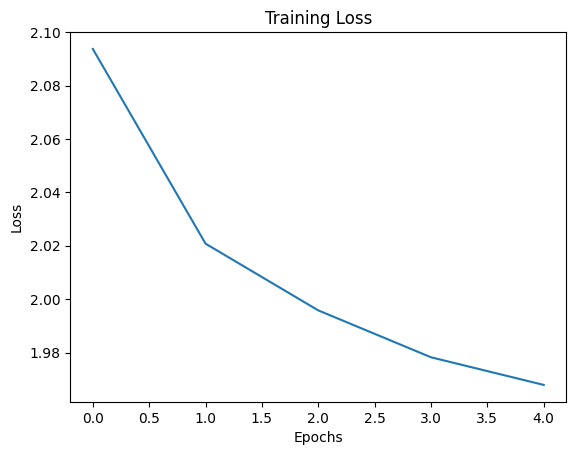

In [ ]:
from tqdm import tqdm

# Train the neural network
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set model to training mode
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0
        for images, labels in tqdm(train_loader):
            # Flatten the input (convert to samples and features)
            images = images.view(images.size(0), -1)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        epoch_loss /= len(train_loader)
        losses.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

    # Plot training loss
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

train_model(model, train_loader, criterion, optimizer, epochs=5)


In [ ]:
# Evaluate the model on the test dataset
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No gradient calculation during testing
        for images, labels in tqdm(test_loader):
            # Flatten the input
            images = images.view(images.size(0), -1)

            outputs = model(images)
            predicted = torch.argmax(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"\nTest Accuracy: {accuracy:.2f}%")

evaluate_model(model, test_loader)


100%|██████████| 625/625 [00:03<00:00, 203.00it/s]


Test Accuracy: 37.55%


In [ ]:
def class_wise_accuracy(model, test_loader, num_classes=10):
    model.eval()  # Set the model to evaluation mode
    class_correct = [0] * num_classes
    class_total = [0] * num_classes

    # Disable gradient calculation during evaluation
    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            # Flatten images
            images = images.view(images.size(0), -1)
            # Get predictions
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)

            # Update class-wise counts
            for label, prediction in zip(labels, predictions):
                if label == prediction:     # if match, count it.
                    class_correct[label] += 1
                class_total[label] += 1     # Keep track of the total number of samples

    # Print class-wise accuracy
    for i in range(num_classes):
          accuracy = 100 * class_correct[i] / class_total[i]
          print(f"\nClass {i}: {accuracy}%")

class_wise_accuracy(model, test_loader)


100%|██████████| 625/625 [00:02<00:00, 256.45it/s]


Class 0: 65.8%

Class 1: 42.2%

Class 2: 12.6%

Class 3: 21.7%

Class 4: 27.6%

Class 5: 25.5%

Class 6: 52.5%

Class 7: 39.6%

Class 8: 39.2%

Class 9: 48.8%
